In [1]:
import os
os.getcwd()

'C:\\Users\\Gayatri_dasari\\OneDrive\\Desktop\\remote internship 2020\\data sets\\Deployment-flask\\Deployment-flask'

In [2]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('airports.csv')

In [4]:
df_use=pd.read_csv('flights.csv')
df=df_use.sample(n=100000).copy()
del df_use

C:\Users\Gayatri_dasari\OneDrive\Documents\an\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
df.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
3025585,2015,7,9,4,AS,686,N468AS,PDX,ORD,1030,...,1619.0,-11.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3849308,2015,8,27,4,WN,2254,N407WN,EWR,HOU,1310,...,1538.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4295600,2015,9,25,5,MQ,3361,N918MQ,DFW,SJT,845,...,929.0,-20.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3279965,2015,7,24,5,EV,5130,N712EV,ATL,CAE,1025,...,1122.0,-3.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5303922,2015,11,28,6,WN,2378,N618WN,ATL,MCI,2055,...,2204.0,-6.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.groupby('DEPARTURE_DELAY').size()

DEPARTURE_DELAY
-48.0      1
-40.0      1
-39.0      1
-38.0      1
-31.0      2
          ..
 1042.0    1
 1065.0    1
 1073.0    1
 1215.0    1
 1589.0    1
Length: 472, dtype: int64

In [8]:
df['OUTPUT_LABEL']=(df.DEPARTURE_DELAY>=15).astype(int)

Text(0.5, 1.0, 'Scatter plot on flight dataset')

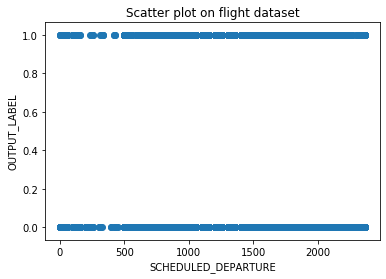

In [9]:
plt.scatter(df['SCHEDULED_DEPARTURE'],df['OUTPUT_LABEL'])
plt.xlabel('SCHEDULED_DEPARTURE')
plt.ylabel('OUTPUT_LABEL')
plt.title('Scatter plot on flight dataset')

Text(0.5, 1.0, 'Scatter plot on flight dataset')

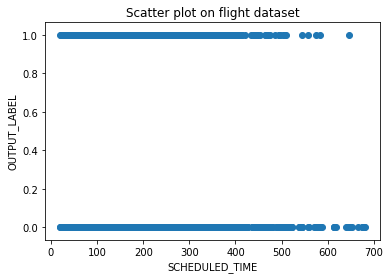

In [10]:
plt.scatter(df['SCHEDULED_TIME'],df['OUTPUT_LABEL'])
plt.xlabel('SCHEDULED_TIME')
plt.ylabel('OUTPUT_LABEL')
plt.title('Scatter plot on flight dataset')

Text(0.5, 1.0, 'Scatter plot on flight dataset')

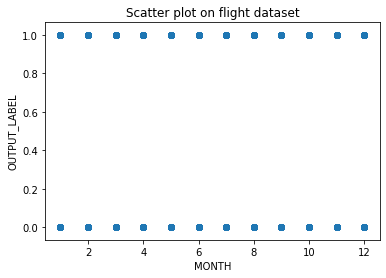

In [11]:
plt.scatter(df['MONTH'],df['OUTPUT_LABEL'])
plt.xlabel('MONTH')
plt.ylabel('OUTPUT_LABEL')
plt.title('Scatter plot on flight dataset')

Text(0.5, 1.0, 'Scatter plot on flight dataset')

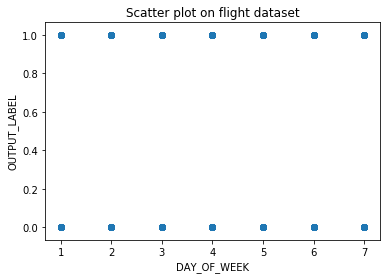

In [12]:
plt.scatter(df['DAY_OF_WEEK'],df['OUTPUT_LABEL'])
plt.xlabel('DAY_OF_WEEK')
plt.ylabel('OUTPUT_LABEL')
plt.title('Scatter plot on flight dataset')

In [13]:
def cal_prevalence(y_actual):
    return(sum(y_actual)/len(y_actual))

In [14]:
print('Prevalence:%.3f'%cal_prevalence(df['OUTPUT_LABEL'].values))

Prevalence:0.181


In [15]:
df_airports=pd.read_csv('airports.csv')
df_airports

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447
...,...,...,...,...,...,...,...
317,WRG,Wrangell Airport,Wrangell,AK,USA,56.48433,-132.36982
318,WYS,Westerly State Airport,West Yellowstone,MT,USA,44.68840,-111.11764
319,XNA,Northwest Arkansas Regional Airport,Fayetteville/Springdale/Rogers,AR,USA,36.28187,-94.30681
320,YAK,Yakutat Airport,Yakutat,AK,USA,59.50336,-139.66023


In [16]:
df.loc[~df.ORIGIN_AIRPORT.isin(df_airports.IATA_CODE.values),'ORIGIN_AIRPORT']='OTHERS'
df.loc[~df.DESTINATION_AIRPORT.isin(df_airports.IATA_CODE.values),'DESTINATION_AIRPORT']='OTHERS'

In [17]:
df=df.drop(columns=['TAXI_OUT', 'TAXI_IN', 'WHEELS_ON', 'WHEELS_OFF', 'YEAR',  'AIR_SYSTEM_DELAY','ELAPSED_TIME','CANCELLED',
                       'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY',
                       'WEATHER_DELAY', 'DIVERTED', 'CANCELLATION_REASON',
                     'TAIL_NUMBER', 'AIR_TIME'])

In [18]:
df['AIRLINE'].replace(['UA','AA','US','F9','B6','OO','AS','NK','WN','DL','EV','HA','MQ','VX'],[1,2,3,4,5,6,7,8,9,10,11,12,13,14],inplace=True)
     

In [19]:
df['ORIGIN_AIRPORT'].replace(['ABE','ABI','ABQ','ABR','ABY','ACK','ACT','ACV','ACY','ADK','ADQ','AEX','AGS','AKN','ALB','ALO','AMA','ANC','APN','ASE','ATL','ATW','AUS','AVL','AVP','AZO','BDL','BET','BFL','BGM','BGR','BHM','BIL','BIS','BJI','BLI','BMI','BNA','BOI','BOS','BPT','BQK','BQN','BRD','BRO','BRW','BTM','BTR','BTV','BUF','BUR','BWI','BZN','CAE','CAK','CDC','CDV','CEC','CHA','CHO','CHS','CID','CIU','CLD','CLE','CLL','CLT','CMH','CMI','CMX','CNY','COD','COS','COU','CPR','CRP','CRW','CSG','CVG','CWA','DAB','DAL','DAY','DBQ','DCA','DEN','DFW','DHN','DIK','DLG','DLH','DRO','DSM','DTW','DVL','EAU','ECP','EGE','EKO','ELM','ELP','ERI','ESC','EUG','EVV','EWN','EWR','EYW','FAI','FAR','FAT','FAY','FCA','FLG','FLL','FNT','FSD','FSM','FWA','GCC','GCK','GEG','GFK','GGG','GJT','GNV','GPT','GRB','GRI','GRK','GRR','GSO','GSP','GST','GTF','GTR','GUC','GUM','HDN','HIB','HLN','HNL','HOB','HOU','HPN','HRL','HSV','HYA','HYS','IAD','IAG','IAH','ICT','IDA','ILG','ILM','IMT','IND','INL','ISN','ISP','ITH','ITO','JAC','JAN','JAX','JFK','JLN','JMS','JNU','KOA','KTN','LAN','LAR','LAS','LAW','LAX','LBB','LBE','LCH','LEX','LFT','LGA','LGB','LIH','LIT','LNK','LRD','LSE','LWS','MAF','MBS','MCI','MCO','MDT','MDW','MEI','MEM','MFE','MFR','MGM','MHK','MHT','MIA','MKE','MKG','MLB','MLI','MLU','MMH','MOB','MOT','MQT','MRY','MSN','MSO','MSP','MSY','MTJ','MVY','MYR','OAJ','OAK','OGG','OKC','OMA','OME','ONT','ORD','ORF','ORH','OTH','OTZ','PAH','PBG','PBI','PDX','PHF','PHL','PHX','PIA','PIB','PIH','PIT','PLN','PNS','PPG','PSC','PSE','PSG','PSP','PUB','PVD','PWM','RAP','RDD','RDM','RDU','RHI','RIC','RKS','RNO','ROA','ROC','ROW','RST','RSW','SAF','SAN','SAT','SAV','SBA','SBN','SBP','SCC','SCE','SDF','SEA','SFO','SGF','SGU','SHV','SIT','SJC','SJT','SJU','SLC','SMF','SMX','SNA','SPI','SPS','SRQ','STC','STL','STT','STX','SUN','SUX','SWF','SYR','TLH','TOL','TPA','TRI','TTN','TUL','TUS','TVC','TWF','TXK','TYR','TYS','UST','VEL','VLD','VPS','WRG','WYS','XNA','YAK','YUM','OTHERS'],[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323],inplace=True)

In [20]:
df['DESTINATION_AIRPORT'].replace(['ABE','ABI','ABQ','ABR','ABY','ACK','ACT','ACV','ACY','ADK','ADQ','AEX','AGS','AKN','ALB','ALO','AMA','ANC','APN','ASE','ATL','ATW','AUS','AVL','AVP','AZO','BDL','BET','BFL','BGM','BGR','BHM','BIL','BIS','BJI','BLI','BMI','BNA','BOI','BOS','BPT','BQK','BQN','BRD','BRO','BRW','BTM','BTR','BTV','BUF','BUR','BWI','BZN','CAE','CAK','CDC','CDV','CEC','CHA','CHO','CHS','CID','CIU','CLD','CLE','CLL','CLT','CMH','CMI','CMX','CNY','COD','COS','COU','CPR','CRP','CRW','CSG','CVG','CWA','DAB','DAL','DAY','DBQ','DCA','DEN','DFW','DHN','DIK','DLG','DLH','DRO','DSM','DTW','DVL','EAU','ECP','EGE','EKO','ELM','ELP','ERI','ESC','EUG','EVV','EWN','EWR','EYW','FAI','FAR','FAT','FAY','FCA','FLG','FLL','FNT','FSD','FSM','FWA','GCC','GCK','GEG','GFK','GGG','GJT','GNV','GPT','GRB','GRI','GRK','GRR','GSO','GSP','GST','GTF','GTR','GUC','GUM','HDN','HIB','HLN','HNL','HOB','HOU','HPN','HRL','HSV','HYA','HYS','IAD','IAG','IAH','ICT','IDA','ILG','ILM','IMT','IND','INL','ISN','ISP','ITH','ITO','JAC','JAN','JAX','JFK','JLN','JMS','JNU','KOA','KTN','LAN','LAR','LAS','LAW','LAX','LBB','LBE','LCH','LEX','LFT','LGA','LGB','LIH','LIT','LNK','LRD','LSE','LWS','MAF','MBS','MCI','MCO','MDT','MDW','MEI','MEM','MFE','MFR','MGM','MHK','MHT','MIA','MKE','MKG','MLB','MLI','MLU','MMH','MOB','MOT','MQT','MRY','MSN','MSO','MSP','MSY','MTJ','MVY','MYR','OAJ','OAK','OGG','OKC','OMA','OME','ONT','ORD','ORF','ORH','OTH','OTZ','PAH','PBG','PBI','PDX','PHF','PHL','PHX','PIA','PIB','PIH','PIT','PLN','PNS','PPG','PSC','PSE','PSG','PSP','PUB','PVD','PWM','RAP','RDD','RDM','RDU','RHI','RIC','RKS','RNO','ROA','ROC','ROW','RST','RSW','SAF','SAN','SAT','SAV','SBA','SBN','SBP','SCC','SCE','SDF','SEA','SFO','SGF','SGU','SHV','SIT','SJC','SJT','SJU','SLC','SMF','SMX','SNA','SPI','SPS','SRQ','STC','STL','STT','STX','SUN','SUX','SWF','SYR','TLH','TOL','TPA','TRI','TTN','TUL','TUS','TVC','TWF','TXK','TYR','TYS','UST','VEL','VLD','VPS','WRG','WYS','XNA','YAK','YUM','OTHERS'],[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323],inplace=True)

In [21]:
df

,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,OUTPUT_LABEL
3025585,7,9,4,7,686,237,229,1030,1029.0,-1.0,240.0,1739,1630,1619.0,-11.0,0
3849308,8,27,4,9,2254,107,144,1310,1307.0,-3.0,230.0,1411,1600,1538.0,-22.0,0
4295600,9,25,5,13,3361,87,285,845,838.0,-7.0,64.0,229,949,929.0,-20.0,0
3279965,7,24,5,11,5130,21,54,1025,1023.0,-2.0,60.0,192,1125,1122.0,-3.0,0
5303922,11,28,6,9,2378,21,193,2055,2049.0,-6.0,135.0,692,2210,2204.0,-6.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
538835,2,5,4,2,2336,177,236,1410,1407.0,-3.0,279.0,2330,2149,2156.0,7.0,0
4870596,10,31,6,9,3401,323,323,1900,1857.0,-3.0,90.0,432,2030,2021.0,-9.0,0
2433072,6,3,3,1,470,86,164,1845,1841.0,-4.0,85.0,406,2010,1955.0,-15.0,0
4656548,10,18,7,14,321,323,323,900,855.0,-5.0,350.0,2343,1150,1133.0,-17.0,0


In [22]:
col_num=['SCHEDULED_DEPARTURE','SCHEDULED_TIME','FLIGHT_NUMBER','AIRLINE','ORIGIN_AIRPORT','DESTINATION_AIRPORT','DAY_OF_WEEK','MONTH']
col_num

['SCHEDULED_DEPARTURE',
 'SCHEDULED_TIME',
 'FLIGHT_NUMBER',
 'AIRLINE',
 'ORIGIN_AIRPORT',
 'DESTINATION_AIRPORT',
 'DAY_OF_WEEK',
 'MONTH']

In [23]:
df_data=df[col_num+['OUTPUT_LABEL']]

In [24]:
df_data

,SCHEDULED_DEPARTURE,SCHEDULED_TIME,FLIGHT_NUMBER,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DAY_OF_WEEK,MONTH,OUTPUT_LABEL
3025585,1030,240.0,686,7,237,229,4,7,0
3849308,1310,230.0,2254,9,107,144,4,8,0
4295600,845,64.0,3361,13,87,285,5,9,0
3279965,1025,60.0,5130,11,21,54,5,7,0
5303922,2055,135.0,2378,9,21,193,6,11,0
...,...,...,...,...,...,...,...,...,...
538835,1410,279.0,2336,2,177,236,4,2,0
4870596,1900,90.0,3401,9,323,323,6,10,0
2433072,1845,85.0,470,1,86,164,3,6,0
4656548,900,350.0,321,14,323,323,7,10,0


In [25]:
x=df_data.iloc[:,0:8]
y=df_data.iloc[:,8]

In [26]:
x

,SCHEDULED_DEPARTURE,SCHEDULED_TIME,FLIGHT_NUMBER,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DAY_OF_WEEK,MONTH
3025585,1030,240.0,686,7,237,229,4,7
3849308,1310,230.0,2254,9,107,144,4,8
4295600,845,64.0,3361,13,87,285,5,9
3279965,1025,60.0,5130,11,21,54,5,7
5303922,2055,135.0,2378,9,21,193,6,11
...,...,...,...,...,...,...,...,...
538835,1410,279.0,2336,2,177,236,4,2
4870596,1900,90.0,3401,9,323,323,6,10
2433072,1845,85.0,470,1,86,164,3,6
4656548,900,350.0,321,14,323,323,7,10


In [27]:
y

3025585    0
3849308    0
4295600    0
3279965    0
5303922    0
          ..
538835     0
4870596    0
2433072    0
4656548    0
2807293    0
Name: OUTPUT_LABEL, Length: 100000, dtype: int32

In [28]:
#Splitting the dataset into Training set and Test set
from sklearn import model_selection, neighbors
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [29]:
y_train=y_train.astype('int')
y_train

1566442    0
1284619    0
5173950    0
1132602    0
3158537    0
          ..
4249175    0
349154     1
5074892    0
815190     0
4792706    0
Name: OUTPUT_LABEL, Length: 80000, dtype: int32

In [30]:
y_test=y_test.astype('int')
y_test

1653690    0
1946215    0
242782     0
11551      1
282453     0
          ..
2725774    0
2455175    0
151905     0
4993410    0
2865491    0
Name: OUTPUT_LABEL, Length: 20000, dtype: int32

In [31]:
# Perform Logistic Regression
from sklearn.linear_model.logistic import LogisticRegression

lr =LogisticRegression(random_state =0)

lr.fit(x_train, y_train)

C:\Users\Gayatri_dasari\OneDrive\Documents\an\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.linear_model.logistic module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.linear_model. Anything that cannot be imported from sklearn.linear_model is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\Gayatri_dasari\OneDrive\Documents\an\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [32]:
#Predicting on test and train data
lr_y_test =lr.predict(x_test)
lr_y_test

array([0, 0, 0, ..., 0, 0, 0])

In [33]:
lr_y_train = lr.predict(x_train)
lr_y_train

array([0, 0, 0, ..., 0, 0, 0])

In [34]:
#Accuracy score on Test and Train
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, confusion_matrix

print("\nAccuracy score: %f" %(accuracy_score(y_test,lr_y_test) * 100))
print("Recall score : %f" %(recall_score(y_test, lr_y_test) * 100))
print("ROC score : %f\n" %(roc_auc_score(y_test, lr_y_test) * 100))
print(confusion_matrix(y_test, lr_y_test)) 


Accuracy score: 81.860000
Recall score : 0.055142
ROC score : 50.018410

[[16370     3]
 [ 3625     2]]


In [35]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_std = scaler.fit_transform(x_train)
x_test_std = scaler.transform(x_test)
from sklearn.model_selection import cross_val_score, cross_val_predict
lr_acc = cross_val_score(lr, x_train_std, y_train, cv=3, scoring='accuracy', n_jobs=-1)
lr_proba = cross_val_predict(lr, x_train_std, y_train, cv=3, method='predict_proba')
lr_scores = lr_proba[:, 1]

In [36]:
lr_acc

array([0.81898976, 0.81898976, 0.81898297])

In [37]:
lr_accu_train= accuracy_score(y_train,lr_y_train)  #train 98--rs=50  
lr_accu_train

0.8189625

In [38]:
#Evaluate model
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
def ROC_curve(title, y_train, scores, label=None):
    
    # calculate the ROC score
    fpr, tpr, thresholds = roc_curve(y_train, scores)
    print('AUC Score ({}): {:.2f} '.format(title, roc_auc_score(y_train, scores)))

    # plot the ROC curve
    plt.figure(figsize=(8,6))
    plt.plot(fpr, tpr, linewidth=2, label=label, color='b')
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.title('ROC Curve: {}'.format(title), fontsize=16)
    plt.show()

AUC Score (logistic regression): 0.63 


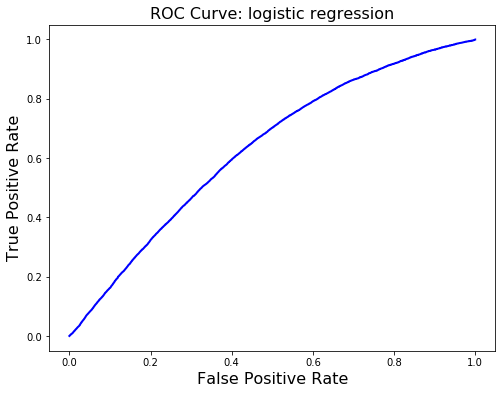

In [39]:
#Plot ROC Curve
ROC_curve('logistic regression', y_train, lr_scores)

In [40]:
#Precision score on Test and Train
from sklearn.metrics import precision_score

lr_precision_test =precision_score(y_test, lr_y_test, average='weighted')  
print(lr_precision_test)
lr_precision_train =precision_score(y_train, lr_y_train, average='weighted')
print(lr_precision_train)

0.7427725831457865
0.7461913541718758


In [41]:
#Recall score on Test and Train
from sklearn.metrics import recall_score
lr_recall_test=recall_score(y_test,lr_y_test, average='weighted' )
print(lr_recall_test)
lr_recall_train=recall_score(y_train,lr_y_train, average='weighted' )
print(lr_recall_train)

0.8186
0.8189625


In [42]:
#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [43]:
#Predicting on test and train data
dtc_y_test =dtc.predict(x_test)
dtc_y_test

array([1, 0, 0, ..., 0, 0, 0])

In [44]:
dtc_y_train = dtc.predict(x_train)
dtc_y_train


array([0, 0, 0, ..., 0, 0, 0])

In [45]:
#Build confusion matrix on Test and Train
from sklearn.metrics import confusion_matrix
dtc_cm_test = confusion_matrix(y_test, dtc_y_test)
dtc_cm_test

array([[13327,  3046],
       [ 2670,   957]], dtype=int64)

In [46]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_std = scaler.fit_transform(x_train)
x_test_std = scaler.transform(x_test)
from sklearn.model_selection import cross_val_score, cross_val_predict
dtc_acc = cross_val_score(dtc, x_train_std, y_train, cv=3, scoring='accuracy', n_jobs=-1)
dtc_proba = cross_val_predict(dtc, x_train_std, y_train, cv=3, method='predict_proba')
dtc_scores = dtc_proba[:, 1]

In [47]:
dtc_acc

array([0.7116661 , 0.7123036 , 0.71146779])

In [48]:
#Accuracy score on Test and Train
from sklearn.metrics import accuracy_score
dtc_accu_test= accuracy_score(y_test,dtc_y_test)
dtc_accu_test

0.7142

In [49]:
dtc_accu_train= accuracy_score(y_train,dtc_y_train)    
dtc_accu_train

0.9958375

In [50]:
#Precision score on Test and Train
from sklearn.metrics import precision_score

dtc_precision_test =precision_score(y_test, dtc_y_test, average='weighted')  
print(dtc_precision_test)
dtc_precision_train =precision_score(y_train, dtc_y_train, average='weighted')
print(dtc_precision_train)

0.7253676325521379
0.9958585489051206


In [51]:
#Recall score on Test and Train
from sklearn.metrics import recall_score
dtc_recall_test=recall_score(y_test,dtc_y_test, average='weighted' )
print(dtc_recall_test)
dtc_recall_train=recall_score(y_train,dtc_y_train, average='weighted' )
print(dtc_recall_train)

0.7142
0.9958375


AUC Score (decision tree classifier): 0.53 


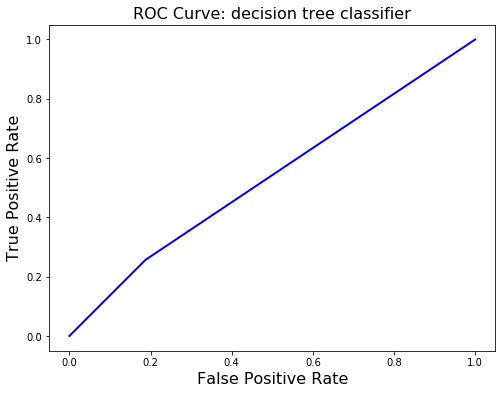

In [52]:
#Plot ROC Curve
ROC_curve('decision tree classifier', y_train, dtc_scores)

In [54]:
from sklearn.linear_model import SGDClassifier
sgdc=SGDClassifier(loss='log',alpha=0.1)
sgdc.fit(x_train,y_train)

SGDClassifier(alpha=0.1, average=False, class_weight=None, early_stopping=False,
              epsilon=0.1, eta0=0.0, fit_intercept=True, l1_ratio=0.15,
              learning_rate='optimal', loss='log', max_iter=1000,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [56]:
sgdc_y_test =sgdc.predict(x_test)
sgdc_y_test

array([1, 1, 1, ..., 1, 1, 1])

In [57]:
#Predicting on test and train data
sgdc_y_test =sgdc.predict(x_test)
sgdc_y_test

array([1, 1, 1, ..., 1, 1, 1])

In [58]:
sgdc_y_train = sgdc.predict(x_train)
sgdc_y_train


array([1, 1, 1, ..., 1, 1, 1])

In [59]:
#Build confusion matrix on Test and Train
from sklearn.metrics import confusion_matrix
sgdc_cm_test = confusion_matrix(y_test, dtc_y_test)
sgdc_cm_test

array([[13327,  3046],
       [ 2670,   957]], dtype=int64)

In [60]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_std = scaler.fit_transform(x_train)
x_test_std = scaler.transform(x_test)
from sklearn.model_selection import cross_val_score, cross_val_predict
sgdc_acc = cross_val_score(sgdc, x_train_std, y_train, cv=3, scoring='accuracy', n_jobs=-1)
sgdc_proba = cross_val_predict(sgdc, x_train_std, y_train, cv=3, method='predict_proba')
sgdc_scores = sgdc_proba[:, 1]

In [65]:
#Accuracy score on Test and Train
from sklearn.metrics import accuracy_score
sgdc_accu_test= accuracy_score(y_test,dtc_y_test)
sgdc_accu_test

0.7142

In [66]:
#Precision score on Test and Train
from sklearn.metrics import precision_score

sgdc_precision_test =precision_score(y_test, dtc_y_test, average='weighted')  
print(sgdc_precision_test)
sgdc_precision_train =precision_score(y_train, dtc_y_train, average='weighted')
print(sgdc_precision_train)

0.7253676325521379
0.9958585489051206


In [68]:
#Recall score on Test and Train
from sklearn.metrics import recall_score
sgdc_recall_test=recall_score(y_test,dtc_y_test, average='weighted' )
print(sgdc_recall_test)
sgdc_recall_train=recall_score(y_train,dtc_y_train, average='weighted' )
print(sgdc_recall_train)

0.7142
0.9958375


AUC Score (decision tree classifier): 0.63 


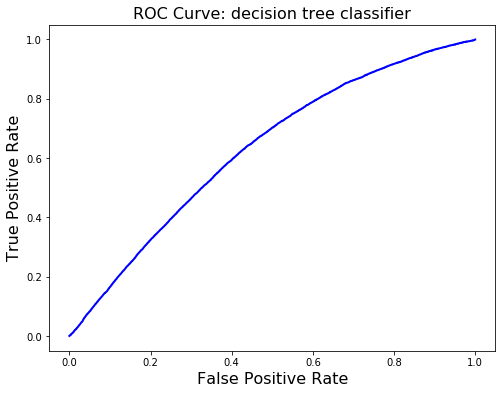

In [69]:
#Plot ROC Curve
ROC_curve('decision tree classifier', y_train, sgdc_scores)

In [71]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(max_depth=6)
rf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=6, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [73]:
#Predicting on test and train data
rf_y_test =rf.predict(x_test)
rf_y_test

array([0, 0, 0, ..., 0, 0, 0])

In [74]:
rf_y_train = rf.predict(x_train)
rf_y_train


array([0, 0, 0, ..., 0, 0, 0])

In [75]:
#Build confusion matrix on Test and Train
from sklearn.metrics import confusion_matrix
rf_cm_test = confusion_matrix(y_test, rf_y_test)
rf_cm_test

array([[16373,     0],
       [ 3627,     0]], dtype=int64)

In [76]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_std = scaler.fit_transform(x_train)
x_test_std = scaler.transform(x_test)
from sklearn.model_selection import cross_val_score, cross_val_predict
rf_acc = cross_val_score(rf, x_train_std, y_train, cv=3, scoring='accuracy', n_jobs=-1)
rf_proba = cross_val_predict(rf, x_train_std, y_train, cv=3, method='predict_proba')
rf_scores = dtc_proba[:, 1]

In [77]:
#Accuracy score on Test and Train
from sklearn.metrics import accuracy_score
rf_accu_test= accuracy_score(y_test,dtc_y_test)
rf_accu_test

0.7142

In [78]:
#Precision score on Test and Train
from sklearn.metrics import precision_score

rf_precision_test =precision_score(y_test, dtc_y_test, average='weighted')  
print(rf_precision_test)
rf_precision_train =precision_score(y_train, dtc_y_train, average='weighted')
print(rf_precision_train)

0.7253676325521379
0.9958585489051206


In [79]:
#Recall score on Test and Train
from sklearn.metrics import recall_score
rf_recall_test=recall_score(y_test,dtc_y_test, average='weighted' )
print(rf_recall_test)
rf_recall_train=recall_score(y_train,dtc_y_train, average='weighted' )
print(rf_recall_train)

0.7142
0.9958375


AUC Score (decision tree classifier): 0.53 


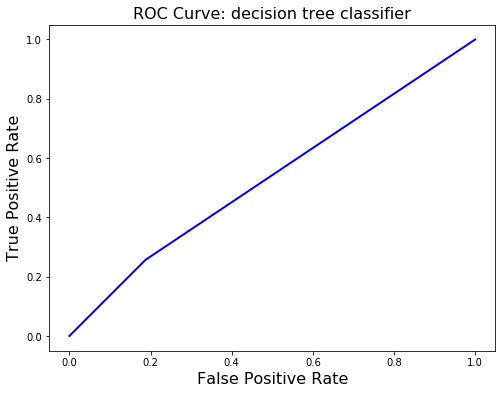

In [80]:
#Plot ROC Curve
ROC_curve('decision tree classifier', y_train, rf_scores)